In [1]:
import cv2, numpy as np, matplotlib.pyplot as plt

In [2]:
thumb = cv2.imread('../archive/leapGestRecog/04/05_thumb/frame_04_05_0001.png',cv2.IMREAD_GRAYSCALE)
ok = cv2.imread('../archive/leapGestRecog/04/07_ok/frame_04_07_0003.png',cv2.IMREAD_GRAYSCALE)
l = cv2.imread('../archive/leapGestRecog/05/02_l/frame_05_02_0002.png',cv2.IMREAD_GRAYSCALE)
photos = (thumb, ok, l)

In [3]:
def show_photos_and_hist(photos):
    for i in photos:
        fig, axs = plt.subplots(1,2)
        fig.set_size_inches(10,2)
        axs[0].imshow(i, 'gray')
        axs[0].axis('off')
        axs[1].plot(cv2.calcHist([i],[0],None,[256],[0,256]))
        
def BBHE(img):
    H = cv2.calcHist([img],[0],None,[256],[0,256])
    
    lm = int(np.mean(img))
    
    H1 = H[:lm]
    H2 = H[lm:]
    C1 = H1.cumsum()
    C2 = H2.cumsum()
    C1n = C1/np.max(C1)
    C2n = C2/np.max(C2)
    C1s = C1n*(lm-1)
    C2s = lm + (255 - lm)*C2n
    return np.r_[C1s, C2s].astype('uint8')

def DSIHE(img):
    H = cv2.calcHist([img],[0],None,[256],[0,256])
    
    lm = H.cumsum()
    lm = np.min(lm[lm>(np.max(lm)-np.min(lm))/2+np.min(lm)])
    lm = np.where(lm==H.cumsum())[0][0]
    
    H1 = H[:lm]
    H2 = H[lm:]
    C1 = H1.cumsum()
    C2 = H2.cumsum()
    C1n = C1/np.max(C1)
    C2n = C2/np.max(C2)
    C1s = C1n*(lm-1)
    C2s = lm + (255 - lm)*C2n
    return np.r_[C1s, C2s].astype('uint8')

Below are presented photos (original) from dataset and histograms presenting color distribution. Dominating color is black with pixel value in range [0;25]. In some cases ther is no clear pick for light colors and for others the pick is very small.

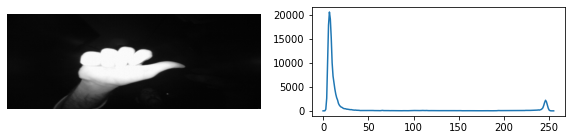

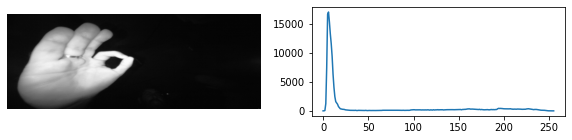

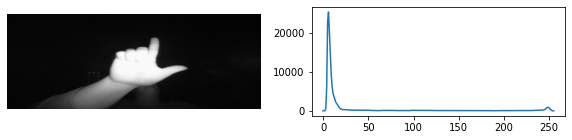

In [4]:
show_photos_and_hist(photos)

Below I have teseted histogram equalization using 3 different alghoritms and clahe alghoritm, which adapts local histogram equalization

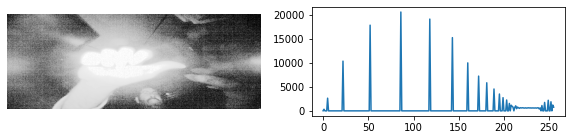

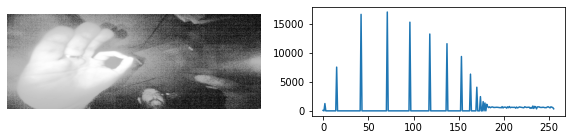

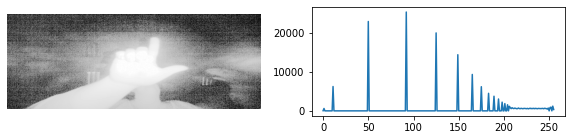

In [5]:
show_photos_and_hist([cv2.equalizeHist(x) for x in photos])

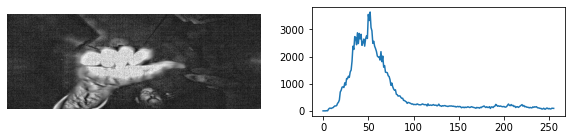

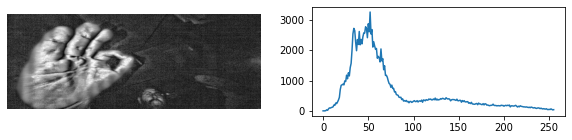

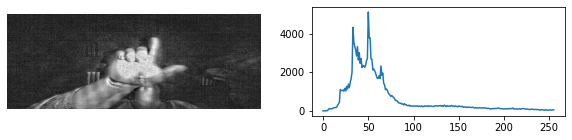

In [6]:
clahe = cv2.createCLAHE(16,(24,64))
show_photos_and_hist([clahe.apply(x) for x in photos])

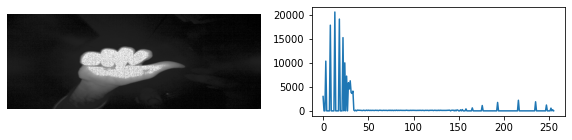

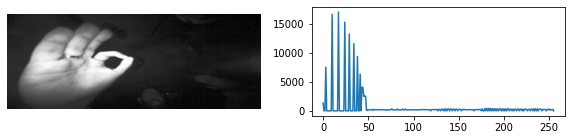

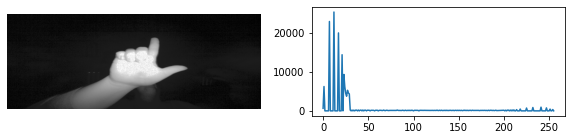

In [37]:
show_photos_and_hist([cv2.LUT(x, BBHE(x), None) for x in photos])

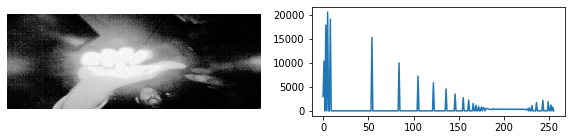

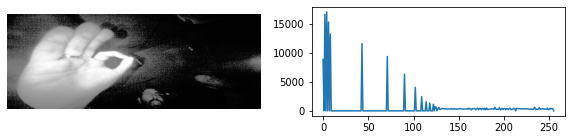

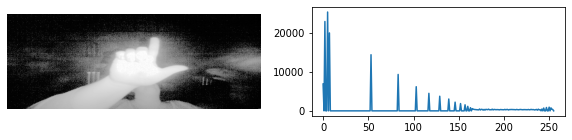

In [36]:
show_photos_and_hist([cv2.LUT(x, DSIHE(x), None) for x in photos])

In [27]:
black_fist = cv2.imread('./../additional_photos/black_fist')
black_fist = cv2.cvtColor(black_fist, cv2.COLOR_BGR2GRAY)

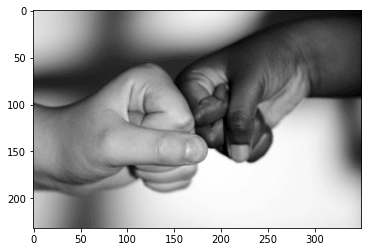

In [28]:
plt.imshow(black_fist,'gray')

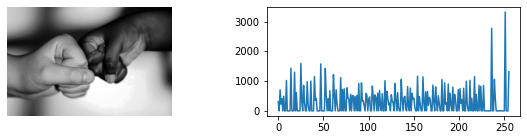

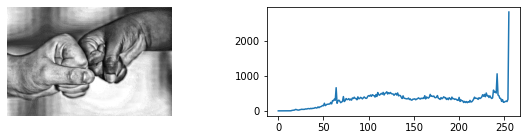

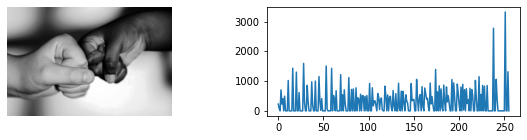

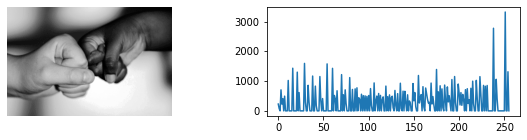

In [29]:
show_photos_and_hist([cv2.equalizeHist(x) for x in [black_fist]])
show_photos_and_hist([clahe.apply(x) for x in [black_fist]])
show_photos_and_hist([cv2.LUT(x, BBHE(x), None) for x in [black_fist]])
show_photos_and_hist([cv2.LUT(x, DSIHE(x), None) for x in [black_fist]])

Best results for clahe transoframtion  
Input will be transforme using clahe